# Scraping and Analysis of Fashion Trends and Pricing

## Solution Planning

1. Business understanding
2. Web scraping (extract)
3. Data cleaning (transfor)
4. Save data into database (load)
5. Data analysis
6. Delivery of the answers and insights via report

In [1]:
import pandas             as pd
import numpy              as np
import seaborn            as sns

import plotly.express     as px
import matplotlib.pyplot  as plt

from IPython.core.display import HTML
from sqlalchemy           import create_engine
from matplotlib.ticker    import PercentFormatter

### 0.1 Helper Functions

In [2]:
def personal_settings():
    
    # notebook
    display(HTML('<style>.container{width:98% !important;}</style>'))
    np.set_printoptions(suppress=True)
    pd.options.display.float_format = '{:.2f}'.format
    
    # seaborn
    sns.set(rc={'figure.figsize':(22,10)})
    sns.set_theme(style = 'darkgrid', font_scale = 1.2)
    sns.set_palette('RdBu_r')
    
    return None

def plot_pareto_by(df_, group_by, column, figsize):
    
    df = df_.groupby(group_by)[column].count().reset_index()
    df = df.sort_values(by=column,ascending=False)

    df["cumpercentage"] = df[column].cumsum()/df[column].sum()*100

    fig, ax = plt.subplots(figsize=figsize)
    ax.bar(df[group_by], df[column], color="C0")
    
    ax2 = ax.twinx()
    ax2.plot(df[group_by], df["cumpercentage"], color="C1", marker="D", ms=7)
    ax2.yaxis.set_major_formatter(PercentFormatter())

    ax.tick_params(axis="y", colors="C0")
    ax2.tick_params(axis="y", colors="C1")

    for tick in ax.get_xticklabels():
        tick.set_rotation(90)
        
    plt.show()
    
    return None

def cumultive_percentage(df, group_by, column):
    aux = df[[column, group_by]].groupby(group_by).count().sort_values(column, ascending=False).reset_index()
    #aux['%culm_'+group_by] = (aux.index + 1)/aux[group_by].count()*100
    aux['%culm_'+column] = aux[column].cumsum()/aux[column].sum()*100
    
    return aux

In [3]:
personal_settings()

### 0.2 Loading Data

In [4]:
database_name = 'database_hm.db'
conn = create_engine('sqlite:///' + database_name, echo=False)

In [5]:
query = """
    SELECT * FROM hm_products;
"""

In [6]:
df_raw = pd.read_sql(query, con=conn)

## 1.0 Data Description

In [7]:
df1 = df_raw.copy()
df1

,product_id,price,name,color_id,color_name,style_id,style,length,waist,fit,...,spandex,polyester,elastomultiester,modal,rayon,copolyester,elastodiene,lyocell,other_fibres,scrapy_datetime
0,0941666001,24.99,slim_mom_high_ankle_jeans,001,denim_blue,0941666,mom_tapered,ankle,high,slim,...,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.03,2022-07-07 15:11:50
1,0941666002,24.99,slim_mom_high_ankle_jeans,002,black,0941666,mom_tapered,ankle,high,slim,...,0.01,0.27,0.00,0.00,0.03,0.00,0.00,0.00,0.03,2022-07-07 15:11:50
2,0941666003,24.99,slim_mom_high_ankle_jeans,003,cream,0941666,mom_tapered,ankle,high,slim,...,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2022-07-07 15:11:50
3,0941666004,24.99,slim_mom_high_ankle_jeans,004,medium_blue,0941666,mom_tapered,ankle,high,slim,...,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.03,2022-07-07 15:11:50
4,0941666005,24.99,slim_mom_high_ankle_jeans,005,black_washed,0941666,mom_tapered,ankle,high,slim,...,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.03,2022-07-07 15:11:50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,1091743001,39.99,straight_high_jeans,001,light_denim_blue,1091743,straightleg,long,high,None,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2022-07-07 15:11:50
495,1091743002,39.99,straight_high_jeans,002,denim_blue,1091743,straightleg,long,high,None,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2022-07-07 15:11:50
496,1091743004,39.99,straight_high_jeans,004,dark_gray,1091743,straightleg,long,high,None,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2022-07-07 15:11:50
497,1098576002,24.99,h&m+_90s_baggy_ultra_high_jeans,002,light_denim_blue,1098576,straightleg_widecut,long,ultra high,loose,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2022-07-07 15:11:50


### 1.2 Data Dimension

In [8]:
print(df1.shape[0], 'rows')
print(df1.shape[1], 'columns')

499 rows
22 columns


### 1.3 Data Types

In [9]:
description = []
for i in df1.columns:
    description.append([
        i,
        df1[i].dtypes,
        df1[i].nunique(),
        df1[i].drop_duplicates().sample(2, replace=True).values
    ])

pd.DataFrame(data=description, columns=['attributes','dtypes', 'nunique','sample'])

,attributes,dtypes,nunique,sample
0,product_id,object,499,"[0985604015, 0572998019]"
1,price,float64,9,"[29.99, 49.99]"
2,name,object,82,"[h&m+_skinny_high_jeans, true_to_you_skinny_hi..."
3,color_id,object,57,"[083, 016]"
4,color_name,object,49,"[denim_blue_floral, dark_denim_grey]"
5,style_id,object,112,"[1058007, 1069394]"
6,style,object,26,"[slit, straightleg_trashed]"
7,length,object,3,"[extralong legs, extralong legs]"
8,waist,object,4,"[low , low ]"
9,fit,object,5,"[slim, slim]"


### 1.4 Check NA

In [10]:
description = []
for i in df1.columns:
    description.append([
        i,
        df1[i].isna().sum(),
        round((df1[i].isna().sum()/len(df1))*100)
    ])

pd.DataFrame(data=description, columns=['attributes','null', '%null'])

,attributes,null,%null
0,product_id,0,0.00
1,price,0,0.00
2,name,0,0.00
3,color_id,0,0.00
4,color_name,0,0.00
5,style_id,0,0.00
6,style,124,25.00
7,length,2,0.00
8,waist,6,1.00
9,fit,194,39.00


### 1.5 Fillout NA

To fill the NA in style and fit, a search was made relating the name to the probable style and fit. The sources of the research are:       
https://www.cosmopolitan.com/style-beauty/fashion/g26429319/types-of-jeans/         
https://www.thesun.co.uk/living/3088427/jeans-body-shape-guide-denim-fits-styles/


In [11]:
## fill style

# take all styles in a list
style_names = list(df1['style'].str.split('_', expand=True).stack().unique())

# check the names of jeans with none style
df1.loc[df1['style'].isnull(), 'name'].unique()

# styles researched -  append this style in list style_names
styles_researched = ['straight', 'slim', 'skinny']

for i in range(len(styles_researched)):
    style_names.append(styles_researched[i])

# fill None acoordin with name and style_names and 90's baggy jeans to straightleg (as seen in one research)
for i in range (len(style_names)):
    for j in range (len(df1)):
        if (style_names[i] in df1.loc[j, 'name']) & (df1.loc[j, 'style'] == None):
            df1.loc[j, 'style'] = style_names[i]
        if ('90s_baggy' in df1.loc[j, 'name']) & (df1.loc[j, 'style'] == None):
            df1.loc[j, 'style'] = 'straightleg'

In [12]:
## fill fit

# check the names of fit
df1['fit'].unique()

# check the names of jeans with none fit
df1.loc[df1['fit'].isnull(), 'name'].unique()

df1['fit'] = df1[['name', 
                  'fit']].apply(lambda x: 'loose' if ('wide'in x['name']) & (x['fit'] == None) else
                                          'regular' if (('straight' in x['name']) | ('baggy' in x['name']) | ('mom' in x['name']) | ('flared' in x['name'])) & (x['fit'] == None) else
                                          'skiny' if ('curvy' in x['name']) & (x['fit'] == None) else x['fit'], axis=1)

In [13]:
## fill waist
df1[df1['waist'].isna()]['name']

106    denim_carpenter_overalls
371      mom_fit_denim_overalls
372      mom_fit_denim_overalls
373      mom_fit_denim_overalls
374      mom_fit_denim_overalls
375      mom_fit_denim_overalls
Name: name, dtype: object

In this analysis we just want bottom part of clothes so we will drop later this rows when the product is overalls

In [14]:
## fill fibers
df1['copolyester']  = df1['copolyester'].apply(lambda x: x if x > 0 else 0)
df1['lyocell']      = df1['lyocell'].apply(lambda x: x if x > 0 else 0)
df1['other_fibres'] = df1['other_fibres'].apply(lambda x: x if x > 0 else 0)

In [15]:
# check new %NA
description = []
for i in df1.columns:
    description.append([
        i,
        df1[i].isna().sum(),
        round((df1[i].isna().sum()/len(df1))*100)
    ])

pd.DataFrame(data=description, columns=['attributes','null', '%null'])

,attributes,null,%null
0,product_id,0,0.00
1,price,0,0.00
2,name,0,0.00
3,color_id,0,0.00
4,color_name,0,0.00
5,style_id,0,0.00
6,style,13,3.00
7,length,2,0.00
8,waist,6,1.00
9,fit,36,7.00


### 1.6 Drop NA

In [16]:
df1.dropna(how='any', inplace=True)

In [17]:
df1.columns

Index(['product_id', 'price', 'name', 'color_id', 'color_name', 'style_id',
       'style', 'length', 'waist', 'fit', 'environmental_marker', 'cotton',
       'spandex', 'polyester', 'elastomultiester', 'modal', 'rayon',
       'copolyester', 'elastodiene', 'lyocell', 'other_fibres',
       'scrapy_datetime'],
      dtype='object')

### 1.7 Descriptive Statistical

In [18]:
num_attributes = df1[['price', 'cotton', 'spandex', 'polyester', 'elastomultiester', 'modal', 'rayon', 'copolyester', 'elastodiene', 'lyocell', 'other_fibres' ]]
cat_attributes = df1[['product_id', 'name', 'color_id', 'color_name', 'style_id', 'style', 'length', 'waist', 'fit', 'environmental_marker', 'scrapy_datetime']]

#### 1.7.1 Numerical Attributes

In [19]:
# by the function - count, mean, std, min, quartile 1 (25%), quartile 2(50%), quartile 3 (75%) and max
aux1 = num_attributes.describe().drop('count', axis=0)

# skew and kurtosis
aux2 = pd.DataFrame(num_attributes.apply(lambda x: x.skew())).T
aux3 = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis())).T

# concatenate 
num_summary = pd.concat([aux1, aux2, aux3]).T.reset_index()
num_summary.columns = ['attributes','mean','std','min','25%','50%','75%','max','skew','kurtosis']
num_summary

,attributes,mean,std,min,25%,50%,75%,max,skew,kurtosis
0,price,32.34,7.45,17.99,29.99,29.99,34.99,69.99,1.03,2.12
1,cotton,0.95,0.10,0.00,0.98,0.99,1.00,1.00,-3.50,22.23
2,spandex,0.01,0.01,0.00,0.00,0.01,0.01,0.09,2.51,12.14
3,polyester,0.03,0.08,0.00,0.00,0.00,0.00,0.43,2.28,4.08
4,elastomultiester,0.00,0.01,0.00,0.00,0.00,0.00,0.08,5.43,28.86
5,modal,0.00,0.02,0.00,0.00,0.00,0.00,0.51,21.17,448.00
6,rayon,0.00,0.01,0.00,0.00,0.00,0.00,0.09,10.78,143.23
7,copolyester,0.00,0.01,0.00,0.00,0.00,0.00,0.19,21.17,448.00
8,elastodiene,0.00,0.00,0.00,0.00,0.00,0.00,0.05,21.17,448.00
9,lyocell,0.00,0.01,0.00,0.00,0.00,0.00,0.15,14.92,221.48


💡 The prices are skewed to the right, i.e. the median is lower than the mean. The median price is 29.99 USD. We will use the median as a measure of central tendency, and answer the question of the medium sales price of the products.   
💡 Almost all products have cotton. The average percentage of cotton is 95%.

#### 1.7.2 Categorical Attributes

In [20]:
cat_summary = cat_attributes.astype('category').describe().T
cat_summary 

,count,unique,top,freq
product_id,448,448,0572998001,1
name,448,72,mom_high_ankle_jeans,51
color_id,448,55,001,76
color_name,448,46,light_denim_blue,122
style_id,448,100,0714790,24
style,448,24,straightleg,79
length,448,3,ankle,243
waist,448,4,high,275
fit,448,6,loose,140
environmental_marker,448,2,1,352


## 2.0 Exploratory Data Analysis

In [21]:
df2 = df1.copy()

### Count plot for numeric variables

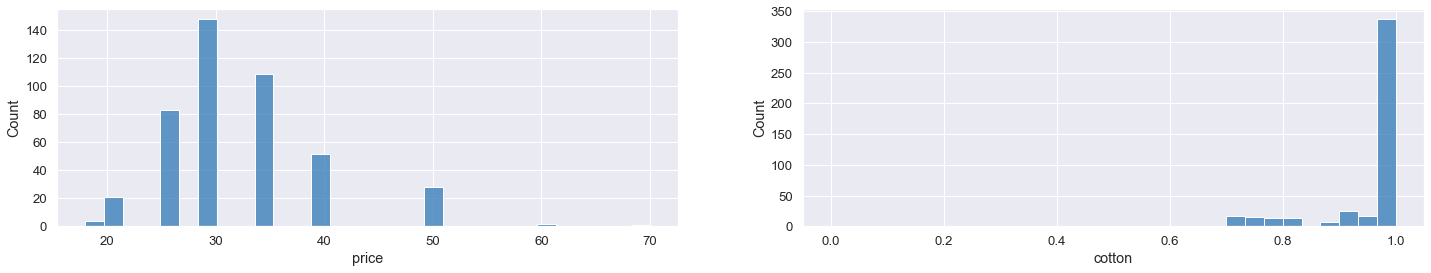

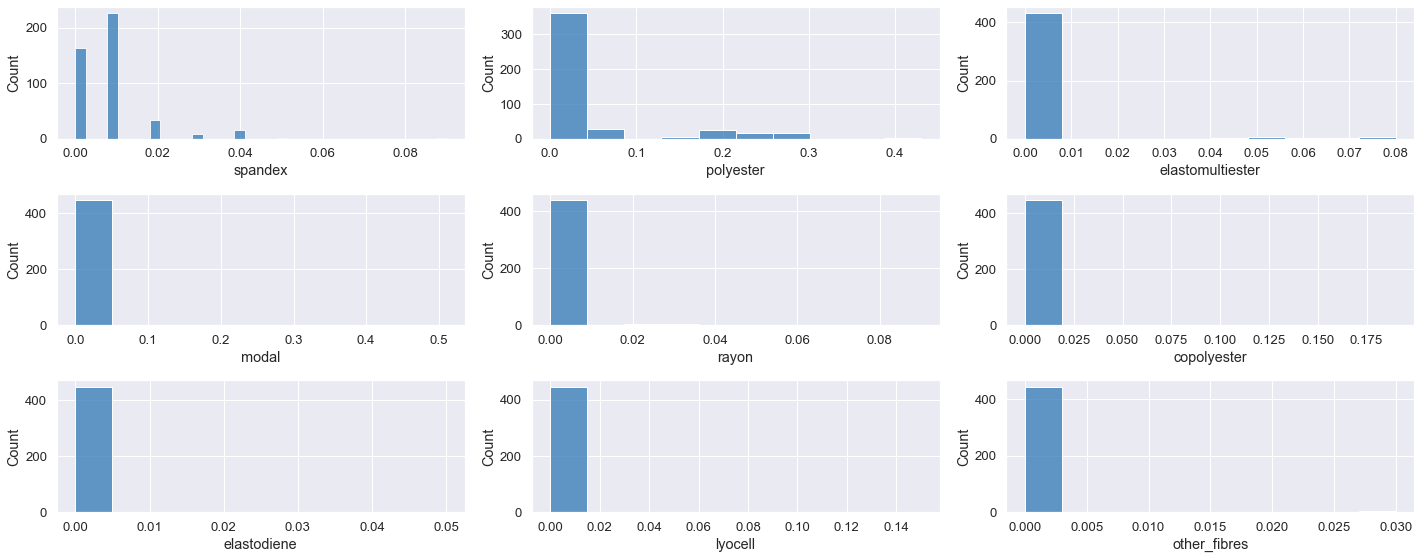

In [22]:
plt.figure(figsize= (24.5, 4))

plt.subplot(1,2,1)
sns.histplot(x='price', data=df2, bins=30)

plt.subplot(1,2,2)
sns.histplot(x='cotton', data=df2, bins=30);

cols = 3
rows = 3

num_cols = df2[['spandex', 'polyester', 'elastomultiester', 'modal', 'rayon', 'copolyester', 'elastodiene', 'lyocell', 'other_fibres']]
fig = plt.figure(figsize= (20, 8))

for i, col in enumerate(num_cols):
    ax=fig.add_subplot( rows, cols, i+1) 
    sns.histplot(x=df2[col], ax=ax)
    
fig.tight_layout()  
plt.show()

💡 As seen previously the median price is around 30 USD, and the fiber that most composes the products is cotton, with many products having a percentage close to 100%.     
💡 Many products have polyester and spadex in their composition.

### Quantity by product name

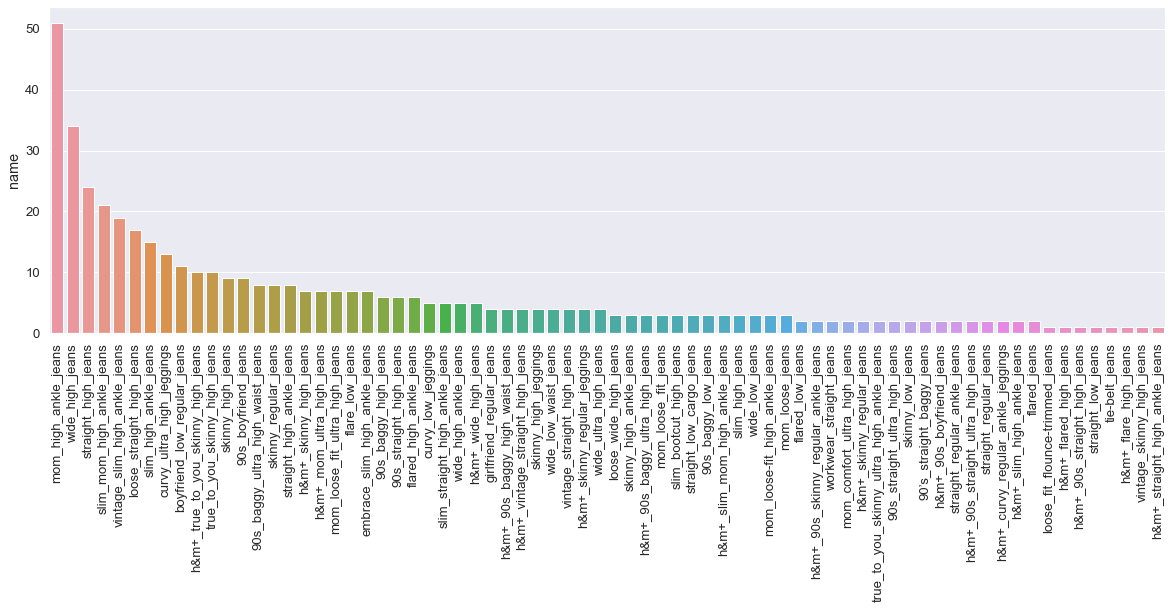

In [23]:
plt.figure(figsize= (20, 6))
sns.barplot(x=df2['name'].value_counts().index,
            y=df2['name'].value_counts())
plt.xticks(rotation=90);

### Pareto of product quantity by product color

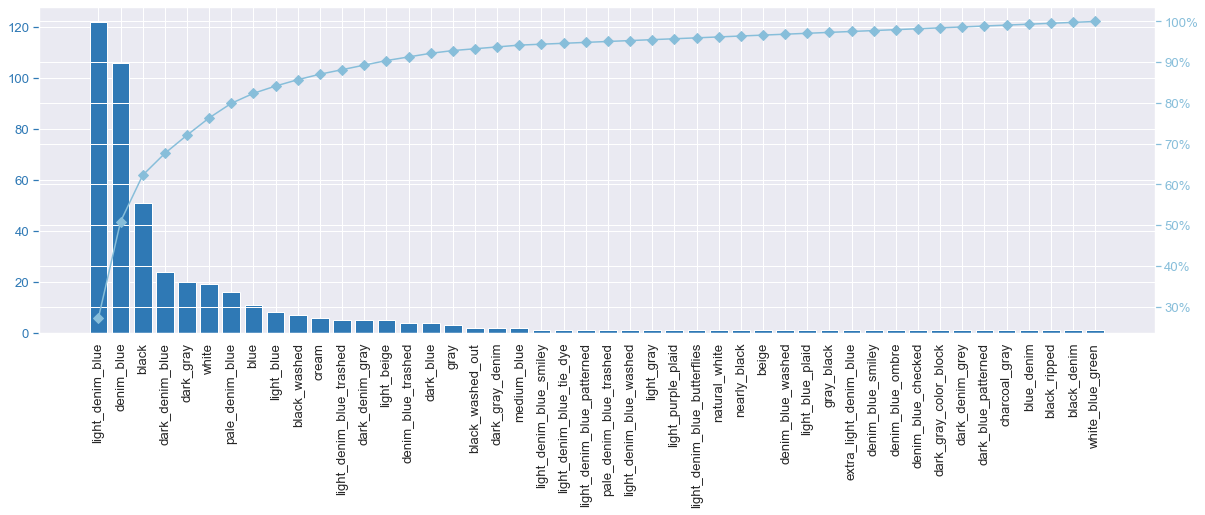

In [24]:
plot_pareto_by(df2, group_by='color_name', column='product_id', figsize=(20, 6))

💡 80% of the products focus on colors up to pale denin blue.

### Pareto of product quantity by product style

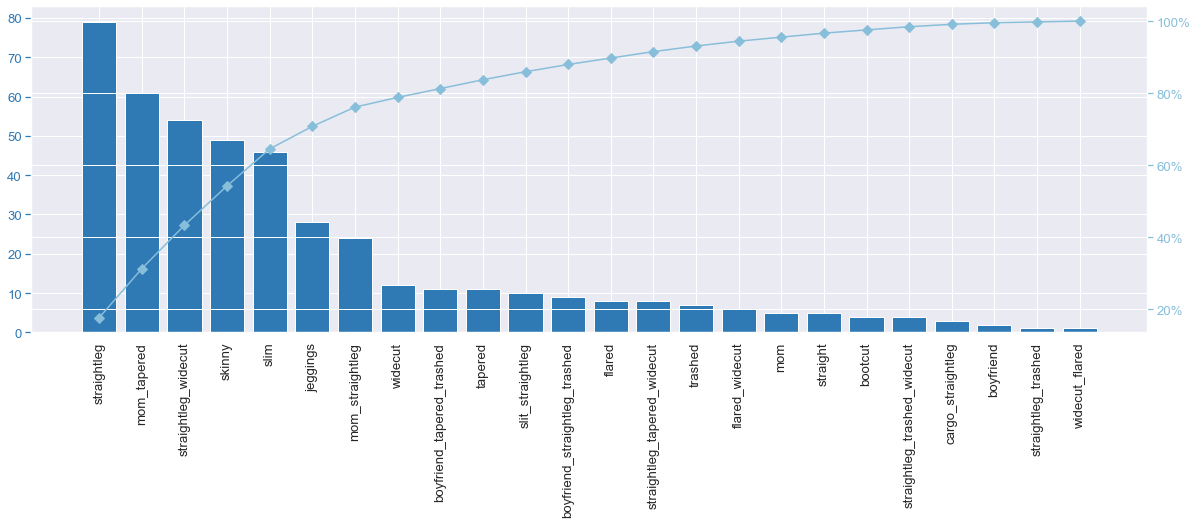

In [25]:
plot_pareto_by(df2, group_by='style', column='product_id', figsize=(20, 6))

💡 80% of the products focus on style up to widecut.

### Number of products per length

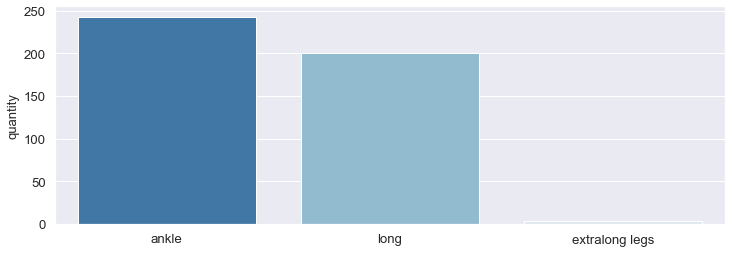

In [26]:
plt.figure(figsize= (12, 4))
sns.barplot(x=df2['length'].value_counts().index,
            y=df2['length'].value_counts())

plt.ylabel('quantity', fontsize=13);

In [27]:
cumultive_percentage(df2, 'length','product_id')

,length,product_id,%culm_product_id
0,ankle,243,54.24
1,long,201,99.11
2,extralong legs,4,100.00


💡 The ankle and long lengths represent practically 100% of the products.

### Number of products per waist

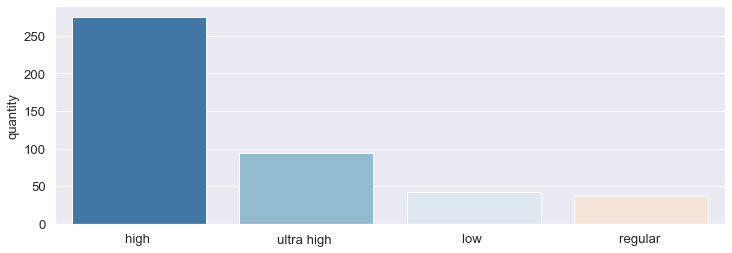

In [28]:
plt.figure(figsize= (12, 4))
sns.barplot(x=df2['waist'].value_counts().index,
            y=df2['waist'].value_counts())

plt.ylabel('quantity', fontsize=13);

In [29]:
cumultive_percentage(df2, 'waist','product_id')

,waist,product_id,%culm_product_id
0,high,275,61.38
1,ultra high,94,82.37
2,low,42,91.74
3,regular,37,100.00


💡 61.38% of the products have a higth waist and 82.37% have either a hight or ultra hight waist.

### Number of products per fit

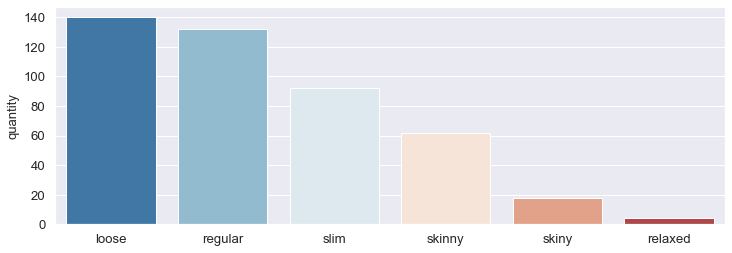

In [30]:
plt.figure(figsize= (12, 4))
sns.barplot(x=df2['fit'].value_counts().index,
            y=df2['fit'].value_counts())

plt.ylabel('quantity', fontsize=13);

In [31]:
cumultive_percentage(df2, 'fit','product_id')

,fit,product_id,%culm_product_id
0,loose,140,31.25
1,regular,132,60.71
2,slim,92,81.25
3,skinny,62,95.09
4,skiny,18,99.11
5,relaxed,4,100.00


💡 80% of the products have fit loose or regular or slim.

### Number of products that are or are not from environmental marker

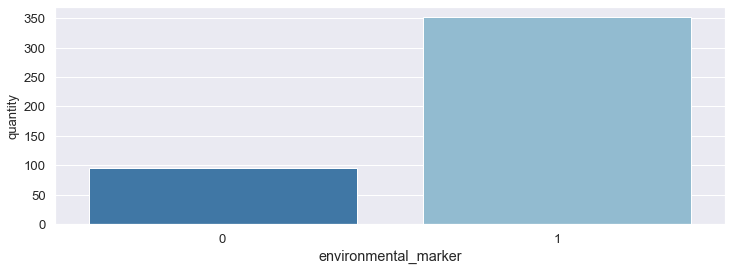

In [32]:
plt.figure(figsize= (12, 4))
sns.countplot(x='environmental_marker', data=df2)
plt.ylabel('quantity', fontsize=13);

In [33]:
cumultive_percentage(df2, 'environmental_marker','product_id')

,environmental_marker,product_id,%culm_product_id
0,1,352,78.57
1,0,96,100.00


💡 Almost 80% of the products are from environmental marker.

### Check the product with the highest price

In [34]:
df2[df2['price'] == 69.99][['cotton', 'spandex', 'polyester', 'elastomultiester', 'modal', 'rayon', 'copolyester', 'elastodiene', 'lyocell', 'other_fibres', 'environmental_marker' ]]

,cotton,spandex,polyester,elastomultiester,modal,rayon,copolyester,elastodiene,lyocell,other_fibres,environmental_marker
39,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1


Its from environmental marker and the composition is cotton 100%.

### Price of products that are or are not from environmental marker

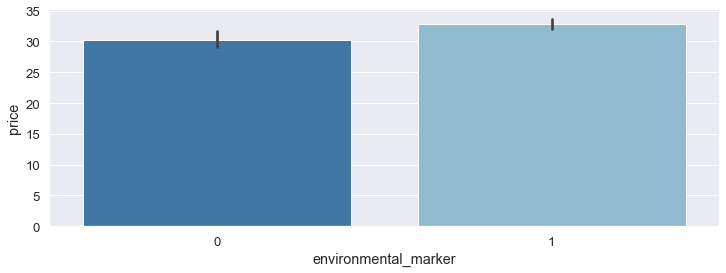

In [35]:
plt.figure(figsize= (12, 4))
sns.barplot(x='environmental_marker', y='price', data=df2);

In [36]:
aux = df2[['environmental_marker', 'price']].groupby('environmental_marker').mean().reset_index()
aux

,environmental_marker,price
0,0,30.29
1,1,32.90


In [37]:
no = aux.iloc[0,1]
yes = aux.iloc[1,1]

percentage = abs(((no - yes) / no)*100)
print(f'\n Environmental marker products are {percentage:.2f}% more expensive than non-environmental marker products.')


 Environmental marker products are 8.60% more expensive than non-environmental marker products.


### Check the median price of the products that are 100% cotton and not.

In [38]:
df2['cotton100%'] = df2['cotton'].apply(lambda x: 1 if x == 1 else 0)

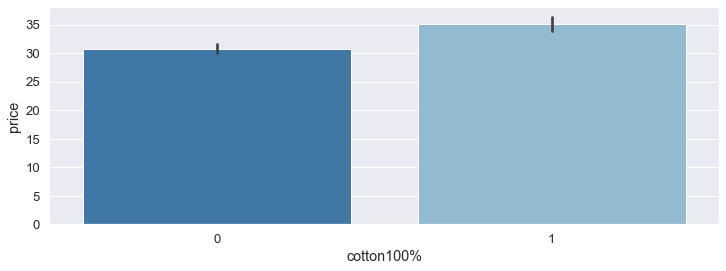

In [39]:
plt.figure(figsize= (12, 4))
sns.barplot(x='cotton100%', y='price', data=df2);

In [43]:
aux = df2[['cotton100%', 'price']].groupby('cotton100%').mean().reset_index()
aux

,cotton100%,price
0,0,30.76
1,1,35.13


In [44]:
no = aux.iloc[0,1]
yes = aux.iloc[1,1]

percentage = abs(((no - yes) / no)*100)
print(f'\n Cotton 100% products are {percentage:.2f}% more expensive than non-cotton 100% products.')


 Cotton 100% products are 14.20% more expensive than non-cotton 100% products.


### Check the product with the lowest price

In [41]:
df2[df2['price'] == 17.99][['cotton', 'spandex', 'polyester', 'elastomultiester', 'modal', 'rayon', 'copolyester', 'elastodiene', 'lyocell', 'other_fibres', 'environmental_marker' ]]

,cotton,spandex,polyester,elastomultiester,modal,rayon,copolyester,elastodiene,lyocell,other_fibres,environmental_marker
28,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
99,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1
100,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
101,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0


These products are also 100% cotton, but only one is from environmental marker.    
Let's use correlation for clarity.

### Correlation matrix for numerical variables

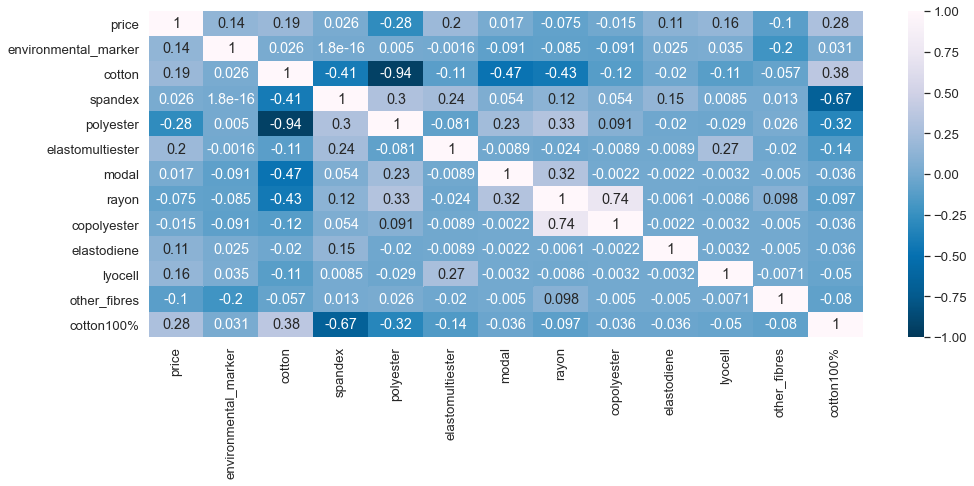

In [42]:
corr = df2.corr(method='pearson')

plt.figure(figsize=(16, 6))bb
sns.heatmap(corr, cmap='PuBu_r', vmin=-1, vmax=1, annot=True);

We see that the variables have a weak to very weak correlation with price, the highest correlations with price are for variables, 100% cotton, polyester (negative correlation), elastomultiester, cotton, lyocell, and environmental marker, in that particular order.

# FINANCIAL MODELING

to model the financial equation for total profit (y) using the form 
y=mx(t)−c, where:

=>  y is the total profit over a period.

=>  m is the price of the product.

=>  x(t) is the rate of sales (units sold as a function of time).

=>  c is the total production and maintenance cost over the same period.


This equation captures the idea that profit is generated by the revenue from sales (price times the quantity sold) minus the costs associated with producing and maintaining the product.

# Example Interpretation:
    - m: If the price of the product is determined by attributes like environmental markers and being 100% cotton, then m would vary depending on these factors.
    - x(t): The sales rate could depend on time-based factors like seasonality, marketing efforts, and market demand.
    - c: The production and maintenance costs would include all fixed and variable costs associated with creating and sustaining the product line.

# Financial Equation with the Given Model:
Given the profit model: y=m×x(t)−c Where:

    - m could be one of the predicted prices (e.g., $10 if the product has both the environmental marker and is 100% cotton).
    
    - x(t) could be modeled or estimated based on sales data over time.
    
    - c would be a constant or could vary depending on production scales, maintenance, and operational efficiency.
    

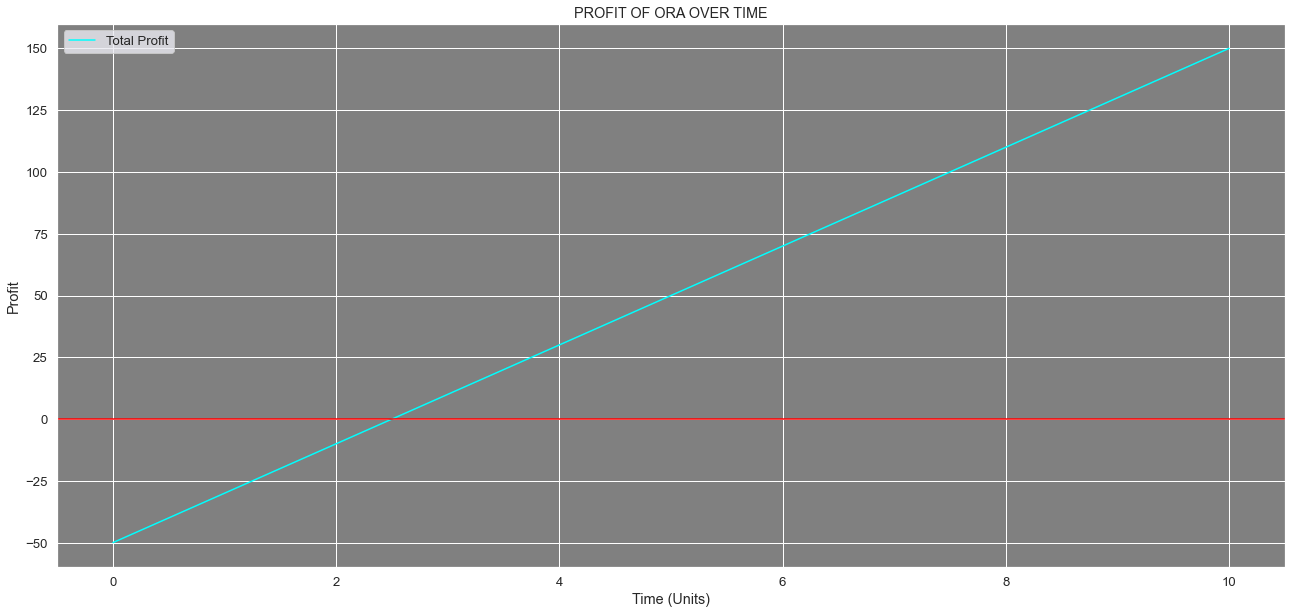

In [81]:
import matplotlib.pyplot as plt
import numpy as np

# Define the equation with chosen values
m = 10  # Price per unit
c = 50  # Total cost
def x_t(t):  # Linear rate function
  return 2 * t

# Generate data points for the graph
t = np.linspace(0, 10, 100)  # Time range
y = m * x_t(t) - c

# Plot the graph
fig, ax = plt.subplots() 
plt.plot(t, y, label='Total Profit', color = 'cyan')
ax.set_facecolor('grey') 
plt.xlabel('Time (Units)')
plt.ylabel('Profit')
plt.title('PROFIT OF ORA OVER TIME')
plt.legend()
plt.axhline(0, color='red', linestyle='-') #BREAK EVEN 
plt.grid(True)

plt.show()